In [1]:
from sqlite3 import Row
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Read the data

In [2]:
cycling_data = pd.read_csv('cycling_updated.csv', delimiter=";", error_bad_lines=True)
weather_data = pd.read_csv('weather_updated.csv', encoding = "ISO-8859-1", error_bad_lines=True)


In [3]:
# from cycling data keep only columns Baana, Pitkäsilta länsipuoli, Heperian puisto/Ooppera, Munkkiniemi silta pohjoispuoli and Kaisaniemi/Eläintarhanlahti
cycling_data = cycling_data[['Päivämäärä', 'Baana', 'Pitkäsilta länsipuoli', 'Heperian puisto/Ooppera', 'Munkkiniemi silta pohjoispuoli', 'Kaisaniemi/Eläintarhanlahti']]


In [4]:



#cycling_data, rename Päivämäärä to Date
cycling_data.rename(columns={'Päivämäärä': 'Date'}, inplace=True)
# sum all columns except Date
cycling_data['Total Cyclists'] = cycling_data.iloc[:, 1:].sum(axis=1)
# remove hour data from Date
cycling_data['Date'] = cycling_data['Date'].str.split(' ', expand=True)[0]
# merge all rows with same Date
cycling_data = cycling_data.groupby('Date').sum().reset_index()
# pick only Date and Total columns
cycling_data = cycling_data[['Date', 'Total Cyclists']]

#max total cyclists
max_cyclists = cycling_data['Total Cyclists'].max()
max_cyclists


18426.0

In [5]:
cycling_data["Date"]
# weather_data create "Date" column based on  "Year", "m" and "d" column YYYY-MM-DD
weather_data["Date"] = weather_data["Year"].astype(str) + "-" + weather_data["m"].astype(str) + "-" + weather_data["d"].astype(str)
weather_data["Date"] = pd.to_datetime(weather_data["Date"], format="%Y-%m-%d")
weather_data["Date"] = weather_data["Date"].dt.date
weather_data["Date"] = pd.to_datetime(weather_data["Date"], format="%Y-%m-%d")
weather_data["Date"]
# remove Yead m d columns
weather_data = weather_data.drop(["Year", "m", "d"], axis=1)
# replace "-" with ""
weather_data = weather_data.replace("-", "")
#remove time and time zone fields
weather_data = weather_data.drop(["Time", "Time zone"], axis=1)
# merge weather_data fields with same Date but keep all columns
weather_data = weather_data.groupby('Date').sum().reset_index()
# weather data column names
weather_data.columns




Index(['Date', 'Precipitation amount (mm)', 'Snow depth (cm)',
       'Air temperature (degC)', 'Ground minimum temperature (degC)',
       'Maximum temperature (degC)', 'Minimum temperature (degC)'],
      dtype='object')

In [6]:
# convert Date to datetime
cycling_data["Date"] = pd.to_datetime(cycling_data["Date"], format="%Y-%m-%d")
# merge cycling and weather data
merged_data = pd.merge(cycling_data, weather_data, on="Date")
# export to json file for browser
merged_data.to_json('merged_data.json', orient='records')
merged_data.head()


,Date,Total Cyclists,Precipitation amount (mm),Snow depth (cm),Air temperature (degC),Ground minimum temperature (degC),Maximum temperature (degC),Minimum temperature (degC)
0,2014-12-01,2662.0,-1,-1,-3.3,-8.7,-1.8,-5
1,2014-12-02,2794.0,-1,-1,0.2,-7.5,2.3,-2.9
2,2014-12-03,3144.0,-1,-1,2.8,1.2,4.4,1.2
3,2014-12-04,2976.0,0,-1,3.1,1.9,4.9,1.8
4,2014-12-05,2373.0,1.4,-1,2.5,-5.2,4.2,-0.7


In [8]:
# get row with max value of total cyclists per year
max_cycling_data2 = merged_data.groupby(merged_data["Date"].dt.year).max()
max_cycling_data = merged_data.loc[merged_data['Total Cyclists'].idxmax()]


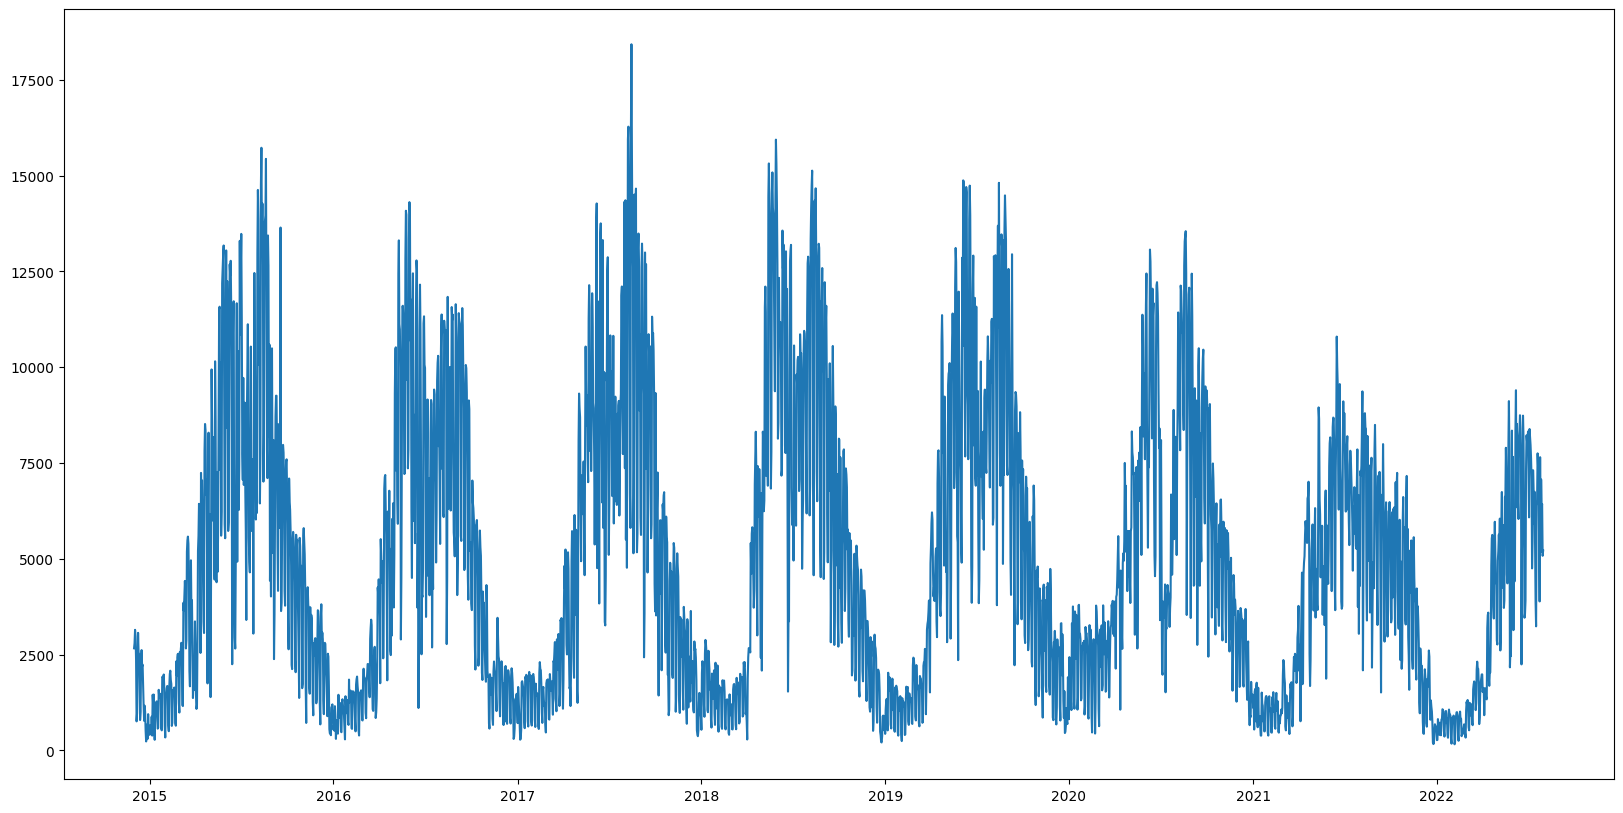

In [10]:
#plot the data
plt.figure(figsize=(20,10))
plt.plot(merged_data["Date"], merged_data["Total Cyclists"], label="Cyclists")
plt.show()
